In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Training the models with all the features

In [2]:
df = pd.read_csv('music_features_scaled.csv')
X = df.drop(columns=['genre', 'filename', 'second'])
Y = df['genre']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [3]:
# sizes of X_train and X_test
print(X_train.shape)
print(X_test.shape)

(23968, 49)
(5993, 49)


### Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=600, random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Results:")
print(classification_report(Y_test, rf_pred))

Random Forest Results:
              precision    recall  f1-score   support

       blues       0.76      0.85      0.80       568
   classical       0.88      0.97      0.92       612
     country       0.73      0.70      0.71       601
       disco       0.73      0.72      0.72       587
      hiphop       0.82      0.70      0.76       637
        jazz       0.80      0.84      0.82       566
       metal       0.83      0.93      0.88       599
         pop       0.80      0.86      0.83       595
      reggae       0.76      0.77      0.77       630
        rock       0.76      0.57      0.65       598

    accuracy                           0.79      5993
   macro avg       0.79      0.79      0.79      5993
weighted avg       0.79      0.79      0.79      5993



In [ ]:
# grid search for best parameters for random forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

print("Best parameters for Random Forest:")
print(grid_search.best_params_)
print("Best score for Random Forest:")
print(grid_search.best_score_)
print("Best estimator for Random Forest:")
print(grid_search.best_estimator_)

Enable to run GridSearch<br>
Run it for 580 min (~10h) with no results<br>
Used best parameters found using the 30s audios

In [7]:
# best random forest model

rf_model_best = RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=400, min_samples_leaf=1, max_features='sqrt', min_samples_split=2,
                       random_state=42)
rf_model_best.fit(X_train, Y_train)
rf_pred_best = rf_model_best.predict(X_test)

print("Random Forest Best Results:")
print(classification_report(Y_test, rf_pred_best))

Random Forest Best Results:
              precision    recall  f1-score   support

       blues       0.71      0.80      0.75       568
   classical       0.86      0.95      0.91       612
     country       0.62      0.57      0.59       601
       disco       0.62      0.60      0.61       587
      hiphop       0.74      0.61      0.67       637
        jazz       0.72      0.76      0.74       566
       metal       0.77      0.92      0.84       599
         pop       0.71      0.82      0.77       595
      reggae       0.65      0.70      0.68       630
        rock       0.64      0.39      0.49       598

    accuracy                           0.71      5993
   macro avg       0.71      0.71      0.70      5993
weighted avg       0.71      0.71      0.70      5993



### SVM

In [8]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Results:")
print(classification_report(Y_test, svm_pred))

SVM Results:
              precision    recall  f1-score   support

       blues       0.71      0.78      0.74       568
   classical       0.89      0.95      0.92       612
     country       0.70      0.67      0.68       601
       disco       0.66      0.67      0.66       587
      hiphop       0.70      0.65      0.67       637
        jazz       0.76      0.80      0.78       566
       metal       0.82      0.90      0.86       599
         pop       0.78      0.77      0.77       595
      reggae       0.73      0.70      0.72       630
        rock       0.62      0.54      0.58       598

    accuracy                           0.74      5993
   macro avg       0.74      0.74      0.74      5993
weighted avg       0.74      0.74      0.74      5993



In [9]:
svm_model = SVC(kernel='poly', random_state=42)
svm_model.fit(X_train, Y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Results:")
print(classification_report(Y_test, svm_pred))

SVM Results:
              precision    recall  f1-score   support

       blues       0.71      0.74      0.73       568
   classical       0.89      0.91      0.90       612
     country       0.60      0.64      0.62       601
       disco       0.54      0.63      0.58       587
      hiphop       0.72      0.56      0.63       637
        jazz       0.73      0.74      0.73       566
       metal       0.82      0.88      0.85       599
         pop       0.82      0.72      0.77       595
      reggae       0.74      0.57      0.64       630
        rock       0.49      0.60      0.54       598

    accuracy                           0.70      5993
   macro avg       0.71      0.70      0.70      5993
weighted avg       0.71      0.70      0.70      5993



### XGBoost

In [10]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# First encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(Y_train)
y_test_encoded = label_encoder.transform(Y_test)

# Now create and train the model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train_encoded)
xgb_pred = xgb_model.predict(X_test)

# Convert predictions back to genre names for the classification report
xgb_pred_decoded = label_encoder.inverse_transform(xgb_pred)

print("XGBoost Results:")
print(classification_report(Y_test, xgb_pred_decoded))


XGBoost Results:
              precision    recall  f1-score   support

       blues       0.81      0.83      0.82       568
   classical       0.90      0.96      0.93       612
     country       0.74      0.76      0.75       601
       disco       0.73      0.77      0.75       587
      hiphop       0.83      0.73      0.78       637
        jazz       0.81      0.82      0.82       566
       metal       0.89      0.92      0.91       599
         pop       0.86      0.84      0.85       595
      reggae       0.78      0.78      0.78       630
        rock       0.68      0.64      0.66       598

    accuracy                           0.80      5993
   macro avg       0.80      0.80      0.80      5993
weighted avg       0.80      0.80      0.80      5993



# Training the models with the top features

In [12]:
df_2 = pd.read_csv('music_features_scaled_top.csv')
X = df_2.drop(columns=['genre'])
Y = df_2['genre']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Random Forest

In [13]:
rf_model_2 = RandomForestClassifier(n_estimators=600, random_state=42)
rf_model_2.fit(X_train, Y_train)
rf_pred = rf_model_2.predict(X_test)

print("Random Forest Results:")
print(classification_report(Y_test, rf_pred))

Random Forest Results:
              precision    recall  f1-score   support

       blues       0.61      0.64      0.63       568
   classical       0.85      0.91      0.88       612
     country       0.54      0.53      0.53       601
       disco       0.56      0.57      0.56       587
      hiphop       0.70      0.65      0.67       637
        jazz       0.63      0.70      0.66       566
       metal       0.74      0.84      0.79       599
         pop       0.75      0.71      0.73       595
      reggae       0.65      0.64      0.64       630
        rock       0.50      0.39      0.44       598

    accuracy                           0.66      5993
   macro avg       0.65      0.66      0.65      5993
weighted avg       0.65      0.66      0.66      5993



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_model_2, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

print("Best parameters for Random Forest:")
print(grid_search.best_params_)
print("Best score for Random Forest:")
print(grid_search.best_score_)
print("Best estimator for Random Forest:")
print(grid_search.best_estimator_)

Enable to run GridSearch<br>
Run it for 580 min (~10h) with no results<br>
Used best parameters found using the 30s audios

In [16]:
# best random forest model

rf_model_best_2 = RandomForestClassifier(bootstrap=True, max_depth=10, n_estimators=300, min_samples_leaf=2, max_features='sqrt', min_samples_split=5, random_state=42)

rf_model_best_2.fit(X_train, Y_train)
rf_pred_best = rf_model_best_2.predict(X_test)

print("Random Forest Best Results:")
print(classification_report(Y_test, rf_pred_best))

Random Forest Best Results:
              precision    recall  f1-score   support

       blues       0.57      0.57      0.57       568
   classical       0.81      0.87      0.84       612
     country       0.46      0.43      0.44       601
       disco       0.46      0.48      0.47       587
      hiphop       0.62      0.59      0.61       637
        jazz       0.58      0.62      0.60       566
       metal       0.65      0.83      0.73       599
         pop       0.72      0.66      0.69       595
      reggae       0.59      0.57      0.58       630
        rock       0.40      0.29      0.34       598

    accuracy                           0.59      5993
   macro avg       0.58      0.59      0.59      5993
weighted avg       0.59      0.59      0.59      5993



### SVM

In [17]:
svm_model_2 = SVC(kernel='poly', random_state=42)
svm_model_2.fit(X_train, Y_train)
svm_pred = svm_model_2.predict(X_test)

print("SVM Results:")
print(classification_report(Y_test, svm_pred))

SVM Results:
              precision    recall  f1-score   support

       blues       0.55      0.40      0.46       568
   classical       0.84      0.87      0.86       612
     country       0.49      0.28      0.35       601
       disco       0.41      0.38      0.40       587
      hiphop       0.64      0.43      0.52       637
        jazz       0.59      0.46      0.52       566
       metal       0.76      0.65      0.70       599
         pop       0.78      0.61      0.69       595
      reggae       0.63      0.39      0.48       630
        rock       0.23      0.70      0.35       598

    accuracy                           0.52      5993
   macro avg       0.59      0.52      0.53      5993
weighted avg       0.59      0.52      0.53      5993



### XGBoost

In [18]:
# xgboost
y_train_encoded = label_encoder.fit_transform(Y_train)
y_test_encoded = label_encoder.transform(Y_test)

# Now create and train the model
xgb_model_2 = XGBClassifier(random_state=42)
xgb_model_2.fit(X_train, y_train_encoded)
xgb_pred = xgb_model_2.predict(X_test)

# Convert predictions back to genre names for the classification report
xgb_pred_decoded = label_encoder.inverse_transform(xgb_pred)

print("XGBoost Results:")
print(classification_report(Y_test, xgb_pred_decoded))

XGBoost Results:
              precision    recall  f1-score   support

       blues       0.60      0.64      0.62       568
   classical       0.89      0.91      0.90       612
     country       0.53      0.53      0.53       601
       disco       0.54      0.57      0.55       587
      hiphop       0.69      0.63      0.66       637
        jazz       0.62      0.69      0.65       566
       metal       0.75      0.83      0.79       599
         pop       0.75      0.73      0.74       595
      reggae       0.64      0.59      0.61       630
        rock       0.46      0.38      0.42       598

    accuracy                           0.65      5993
   macro avg       0.65      0.65      0.65      5993
weighted avg       0.65      0.65      0.65      5993



### Stacking

In [19]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y), 
                yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

Stacking Results:
              precision    recall  f1-score   support

       blues       0.60      0.64      0.62       568
   classical       0.88      0.92      0.89       612
     country       0.53      0.53      0.53       601
       disco       0.53      0.56      0.54       587
      hiphop       0.69      0.63      0.66       637
        jazz       0.63      0.68      0.65       566
       metal       0.76      0.82      0.79       599
         pop       0.75      0.71      0.73       595
      reggae       0.65      0.60      0.62       630
        rock       0.43      0.39      0.41       598

    accuracy                           0.65      5993
   macro avg       0.64      0.65      0.65      5993
weighted avg       0.65      0.65      0.65      5993


Voting Results:
              precision    recall  f1-score   support

       blues       0.60      0.62      0.61       568
   classical       0.85      0.91      0.88       612
     country       0.51      0.50      0.51

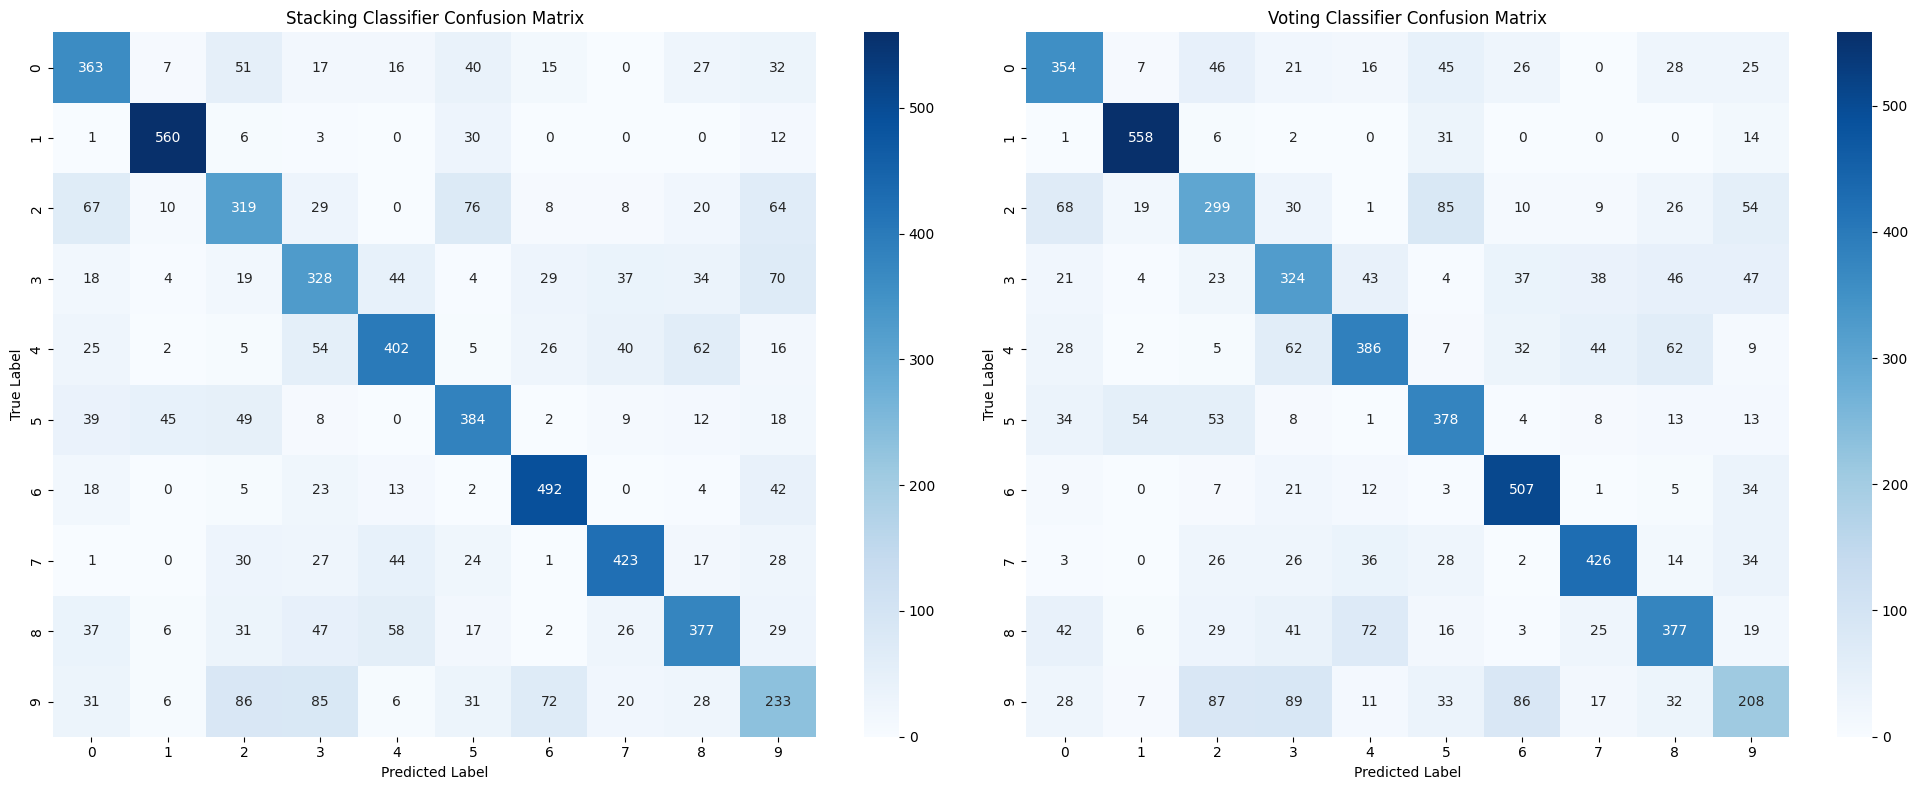

In [20]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Recreate the SVM model with probability=True
svm_model_2 = SVC(probability=True, random_state=42)
svm_model_2.fit(X_train, Y_train)

# Create estimators list
estimators = [
    ('Random Forest', rf_model_best_2), 
    ('SVM', svm_model_2),
    ('XGBoost', xgb_model_2)
]

# Create stacking classifier
stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=2000),
    cv=5
)

# Create voting classifier
voting = VotingClassifier(
    estimators=estimators,
    voting='soft'
)

# Fit both models
stacking.fit(X_train, Y_train)
voting.fit(X_train, Y_train)

# Make predictions
stacking_pred = stacking.predict(X_test)
voting_pred = voting.predict(X_test)

# Print results
print("Stacking Results:")
print(classification_report(Y_test, stacking_pred))

print("\nVoting Results:")
print(classification_report(Y_test, voting_pred))

# Visualize results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot confusion matrices
sns.heatmap(confusion_matrix(Y_test, stacking_pred), 
            annot=True, fmt='d', ax=ax1, cmap='Blues')
ax1.set_title('Stacking Classifier Confusion Matrix')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

sns.heatmap(confusion_matrix(Y_test, voting_pred), 
            annot=True, fmt='d', ax=ax2, cmap='Blues')
ax2.set_title('Voting Classifier Confusion Matrix')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')

plt.tight_layout()
plt.show()